# Red Wine Quality

# Problem Statement

The main aim of the red wine quality dataset is to predict which of the physiochemical features make good wine. With 11 variables and 1 output variable (quality) given, Now lets Start!!!

# Data Set

Data set is taken from kaggle

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/activity

In [4]:
#import the necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split


Data Collection

In [6]:
df = pd.read_csv(r"C:\Users\BORN2C~1\AppData\Local\Temp\Rar$DIa6648.48769\winequality-red.csv")

In [7]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
#rows and columns
df.shape

(1599, 12)

In [12]:
#checking the missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We dont have any misssing value!!!

In [13]:
#Statistical information
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Visualisation

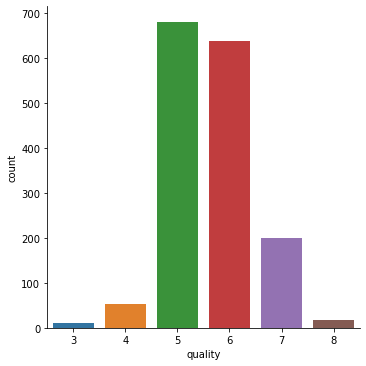

In [14]:
#number of values of each quality
sns.catplot(x='quality',data=df,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

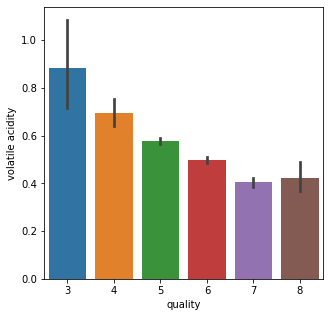

In [15]:
#Volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity', data=df)


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

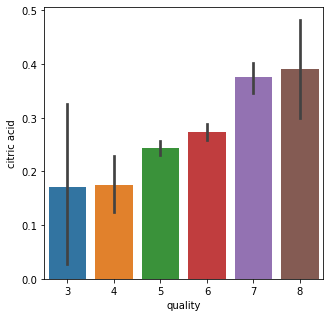

In [16]:
#citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid', data=df)


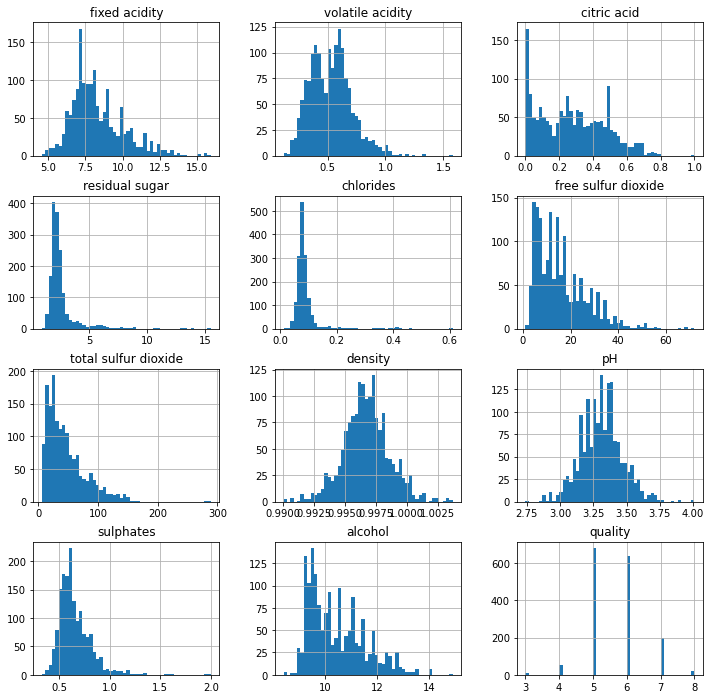

In [20]:
df.hist(bins=50,figsize=(12,12))
plt.show()

Correlation

In [17]:
correlation = df.corr()

<AxesSubplot:>

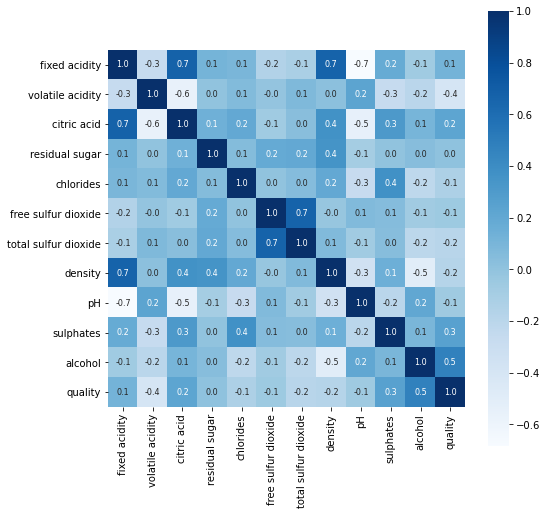

In [18]:
#construct the heatmap to understand the correlation between the columns
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Data Preprocessing

In [21]:
#seperate the data and label
X = df.drop('quality',axis=1)

In [22]:
#here we take value is 1 for quality having value greater than or equal to 7 otherwise 0
Y = df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [23]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [24]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


# Train Test Split

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [28]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


# Model

# Decision Tree

In [29]:
#Model1
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier(random_state=1)
model1.fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test)

print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       283
           1       0.59      0.62      0.61        37

    accuracy                           0.91       320
   macro avg       0.77      0.78      0.78       320
weighted avg       0.91      0.91      0.91       320



# Random Forest

In [30]:
#Model2
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)

print(classification_report(Y_test, Y_pred2))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       283
           1       0.77      0.54      0.63        37

    accuracy                           0.93       320
   macro avg       0.86      0.76      0.80       320
weighted avg       0.92      0.93      0.92       320



# AdaBoost

In [31]:
#Model3
from sklearn.ensemble import AdaBoostClassifier

model3=AdaBoostClassifier(random_state=1)
model3.fit(X_train, Y_train)
Y_pred3 = model3.predict(X_test)

print(classification_report(Y_test, Y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       283
           1       0.70      0.62      0.66        37

    accuracy                           0.93       320
   macro avg       0.82      0.79      0.81       320
weighted avg       0.92      0.93      0.92       320



C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


# Gradient Boosting

In [32]:
#Model4
from sklearn.ensemble import GradientBoostingClassifier

model4=DecisionTreeClassifier(random_state=1)
model4.fit(X_train, Y_train)
Y_pred4 = model4.predict(X_test)

print(classification_report(Y_test, Y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       283
           1       0.59      0.62      0.61        37

    accuracy                           0.91       320
   macro avg       0.77      0.78      0.78       320
weighted avg       0.91      0.91      0.91       320



# XGBoost

In [34]:
#Model5
import xgboost as xgb

model5=xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
Y_pred5 = model5.predict(X_test)

print(classification_report(Y_test, Y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       283
           1       0.70      0.57      0.63        37

    accuracy                           0.92       320
   macro avg       0.82      0.77      0.79       320
weighted avg       0.92      0.92      0.92       320



# Pickle

In [38]:
import pickle
#open the file ,where we want to store the data 
file = open('model2_redwine_quality.pkl','wb')  #here model2 is random Forest
# dump that file 
pickle.dump(model2, file)